In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('../input/train.csv')

In [4]:
train[train['lab_id'].str.startswith("MABe")].head()

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
681,MABe22_keypoints,189552,BTBR,black and tan,male,NaN,10-20 weeks,day 0- 08:22 (lights on),BTBR,black and tan,...,11.7,800,800,52.0,52.0,square,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""fore...",NaN,custom HRnet
682,MABe22_keypoints,301471,BTBR,black and tan,male,NaN,10-20 weeks,day 2- 16:25 (lights on),BTBR,black and tan,...,11.7,800,800,52.0,52.0,square,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""fore...",NaN,custom HRnet
683,MABe22_keypoints,302628,BTBR,black and tan,male,NaN,10-20 weeks,day 2- 18:26 (lights off),BTBR,black and tan,...,11.7,800,800,52.0,52.0,square,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""fore...",NaN,custom HRnet
684,MABe22_keypoints,1271944,C57Bl/6J,black,male,NaN,10-20 weeks,day 2- 16:20 (lights on),C57Bl/6J,black,...,11.7,800,800,52.0,52.0,square,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""fore...",NaN,custom HRnet
685,MABe22_keypoints,1396913,BTBR,black and tan,male,NaN,10-20 weeks,day 1- 04:10 (lights off),BTBR,black and tan,...,11.7,800,800,52.0,52.0,square,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""fore...",NaN,custom HRnet


In [5]:
train["body_parts_tracked"].unique()

array(['["body_center", "ear_left", "ear_right", "headpiece_bottombackleft", "headpiece_bottombackright", "headpiece_bottomfrontleft", "headpiece_bottomfrontright", "headpiece_topbackleft", "headpiece_topbackright", "headpiece_topfrontleft", "headpiece_topfrontright", "lateral_left", "lateral_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]',
       '["body_center", "ear_left", "ear_right", "lateral_left", "lateral_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]',
       '["body_center", "ear_left", "ear_right", "nose", "tail_base"]',
       '["ear_left", "ear_right", "hip_left", "hip_right", "neck", "nose", "tail_base"]',
       '["body_center", "ear_left", "ear_right", "lateral_left", "lateral_right", "nose", "tail_base", "tail_tip"]',
       '["ear_left", "ear_right", "head", "tail_base"]',
       '["ear_left", "ear_right", "nose", "tail_base", "tail_tip"]',
       '["body_center", "ear_left", "ear_right", "forepaw_left", "forepaw_right", "hindpaw_

In [6]:
train_mabe = train.query("lab_id.str.startswith('MABe22_')").copy()
print(train_mabe.shape)

train_mabe = train_mabe[
    ~train_mabe["mouse1_condition"].str.contains("lights on", case=False, na=False)
].copy()

print(train_mabe.shape)

(7926, 38)
(4955, 38)


In [7]:
body_parts_tracked_list = list(np.unique(train.body_parts_tracked))

In [8]:
print(body_parts_tracked_list)

['["body_center", "ear_left", "ear_right", "forepaw_left", "forepaw_right", "hindpaw_left", "hindpaw_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]', '["body_center", "ear_left", "ear_right", "headpiece_bottombackleft", "headpiece_bottombackright", "headpiece_bottomfrontleft", "headpiece_bottomfrontright", "headpiece_topbackleft", "headpiece_topbackright", "headpiece_topfrontleft", "headpiece_topfrontright", "lateral_left", "lateral_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]', '["body_center", "ear_left", "ear_right", "hip_left", "hip_right", "lateral_left", "lateral_right", "nose", "spine_1", "spine_2", "tail_base", "tail_middle_1", "tail_middle_2", "tail_tip"]', '["body_center", "ear_left", "ear_right", "lateral_left", "lateral_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]', '["body_center", "ear_left", "ear_right", "lateral_left", "lateral_right", "nose", "tail_base", "tail_tip"]', '["body_center", "ear_left", "ear_right"

In [9]:
import json


for section in range(0, len(body_parts_tracked_list)):
    body_parts_tracked_str = body_parts_tracked_list[section]
    body_parts = json.loads(body_parts_tracked_str)

    print(f"[PSEUDO] Section {section}/{len(body_parts_tracked_list)-1} | parts={body_parts}")

    subset = train_mabe[train_mabe.body_parts_tracked == body_parts_tracked_str]
    print(subset.shape)

[PSEUDO] Section 0/9 | parts=['body_center', 'ear_left', 'ear_right', 'forepaw_left', 'forepaw_right', 'hindpaw_left', 'hindpaw_right', 'neck', 'nose', 'tail_base', 'tail_midpoint', 'tail_tip']
(4955, 38)
[PSEUDO] Section 1/9 | parts=['body_center', 'ear_left', 'ear_right', 'headpiece_bottombackleft', 'headpiece_bottombackright', 'headpiece_bottomfrontleft', 'headpiece_bottomfrontright', 'headpiece_topbackleft', 'headpiece_topbackright', 'headpiece_topfrontleft', 'headpiece_topfrontright', 'lateral_left', 'lateral_right', 'neck', 'nose', 'tail_base', 'tail_midpoint', 'tail_tip']
(0, 38)
[PSEUDO] Section 2/9 | parts=['body_center', 'ear_left', 'ear_right', 'hip_left', 'hip_right', 'lateral_left', 'lateral_right', 'nose', 'spine_1', 'spine_2', 'tail_base', 'tail_middle_1', 'tail_middle_2', 'tail_tip']
(0, 38)
[PSEUDO] Section 3/9 | parts=['body_center', 'ear_left', 'ear_right', 'lateral_left', 'lateral_right', 'neck', 'nose', 'tail_base', 'tail_midpoint', 'tail_tip']
(0, 38)
[PSEUDO] Sec

In [10]:
train_mabe['body_parts_tracked'].head()

683    ["body_center", "ear_left", "ear_right", "fore...
685    ["body_center", "ear_left", "ear_right", "fore...
686    ["body_center", "ear_left", "ear_right", "fore...
687    ["body_center", "ear_left", "ear_right", "fore...
688    ["body_center", "ear_left", "ear_right", "fore...
Name: body_parts_tracked, dtype: object

In [11]:
train["mouse1_condition"].unique()

array(['wireless device', nan, 'cable', ..., 'day 2- 03:21 (lights off)',
       'estrus', 'csds'], dtype=object)

In [12]:
train["behaviors_labeled"].unique()

array(['["mouse1,mouse2,approach", "mouse1,mouse2,attack", "mouse1,mouse2,avoid", "mouse1,mouse2,chase", "mouse1,mouse2,chaseattack", "mouse1,mouse2,submit", "mouse1,mouse3,approach", "mouse1,mouse3,attack", "mouse1,mouse3,avoid", "mouse1,mouse3,chase", "mouse1,mouse3,chaseattack", "mouse1,mouse3,submit", "mouse1,mouse4,approach", "mouse1,mouse4,attack", "mouse1,mouse4,avoid", "mouse1,mouse4,chase", "mouse1,mouse4,chaseattack", "mouse1,mouse4,submit", "mouse1,self,rear", "mouse2,mouse1,approach", "mouse2,mouse1,attack", "mouse2,mouse1,avoid", "mouse2,mouse1,chase", "mouse2,mouse1,chaseattack", "mouse2,mouse1,submit", "mouse2,mouse3,approach", "mouse2,mouse3,attack", "mouse2,mouse3,avoid", "mouse2,mouse3,chase", "mouse2,mouse3,chaseattack", "mouse2,mouse3,submit", "mouse2,mouse4,approach", "mouse2,mouse4,attack", "mouse2,mouse4,avoid", "mouse2,mouse4,chase", "mouse2,mouse4,chaseattack", "mouse2,mouse4,submit", "mouse2,self,rear", "mouse3,mouse1,approach", "mouse3,mouse1,attack", "mouse3

In [13]:
train_tracking = pd.read_parquet('../input/train_tracking/AdaptableSnail/44566106.parquet')
train_annotation = pd.read_parquet('../input/train_annotation/AdaptableSnail/44566106.parquet')

In [14]:
train_mabe = train[
    train["lab_id"].str.startswith("MABe22_") &
    (train["tracking_method"] == "DeepLabCut")
].copy()

train_mabe.head()

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method


In [15]:
train_tracking.head()

,video_frame,mouse_id,bodypart,x,y
0,0,1,body_center,1161.543945,523.112976
1,0,1,ear_right,1146.305054,587.619995
2,0,1,headpiece_bottomfrontright,1163.192017,588.580017
3,0,1,headpiece_topbackright,1192.211060,558.434998
4,0,1,headpiece_topfrontleft,1191.343994,620.625977


In [16]:
train_annotation.head()

,agent_id,target_id,action,start_frame,stop_frame
0,2,2,rear,4,139
1,4,2,avoid,13,52
2,4,4,rear,121,172
3,3,3,rear,156,213
4,4,4,rear,208,261


Folder: AdaptableSnail
Number of parquet files: 17
['chase' 'avoid' 'attack' 'chaseattack' 'rear' 'approach' 'submit']
Folder: BoisterousParrot
Number of parquet files: 8
['shepherd']
Folder: CalMS21_supplemental
Number of parquet files: 297
['sniff' 'sniffgenital' 'attemptmount' 'mount' 'intromit' 'approach'
 'sniffbody' 'sniffface' 'dominancemount' 'attack']
Folder: CalMS21_task1
Number of parquet files: 101
['sniffgenital' 'sniff' 'mount' 'approach' 'sniffbody' 'attack'
 'sniffface' 'intromit' 'genitalgroom']
Folder: CalMS21_task2
Number of parquet files: 76
['sniff' 'mount' 'attack']
Folder: CautiousGiraffe
Number of parquet files: 10
['reciprocalsniff' 'sniffbody' 'sniff' 'sniffgenital' 'chase' 'escape']
Folder: CRIM13
Number of parquet files: 21
['approach' 'sniff' 'mount' 'disengage' 'rear' 'selfgroom' 'attack']
Folder: DeliriousFly
Number of parquet files: 6
['sniff' 'dominance' 'attack']
Folder: ElegantMink
Number of parquet files: 19
['attack' 'sniff' 'allogroom' 'mount' 'int

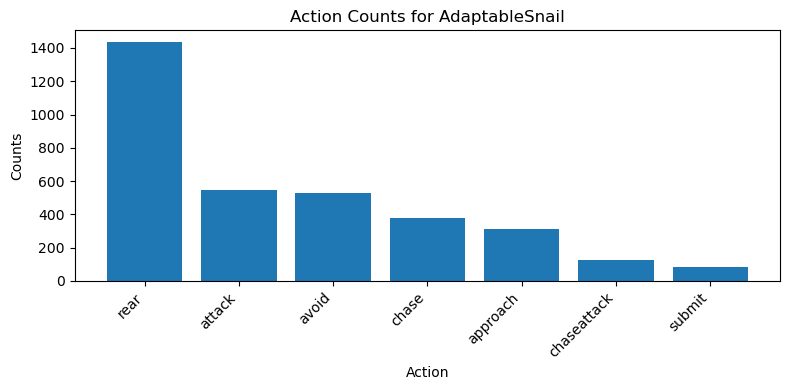

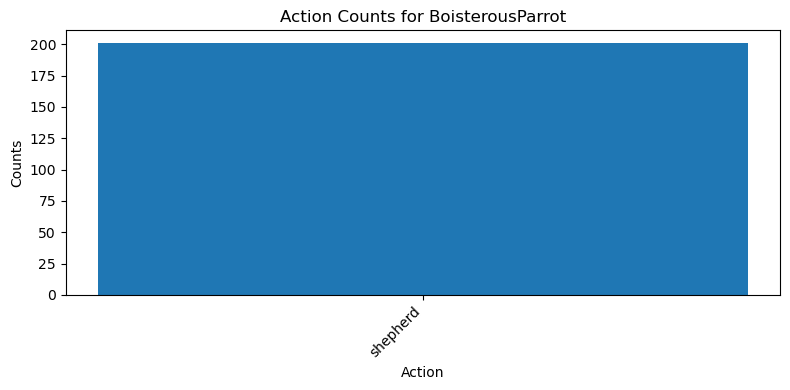

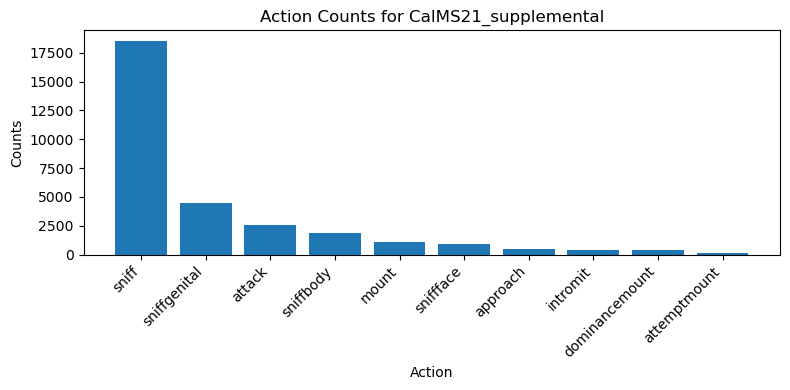

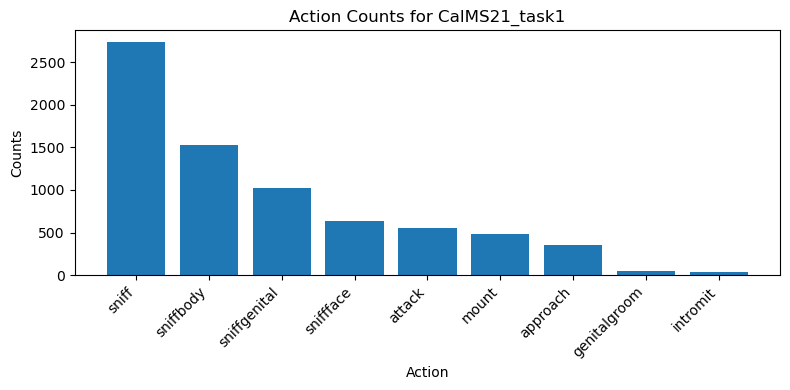

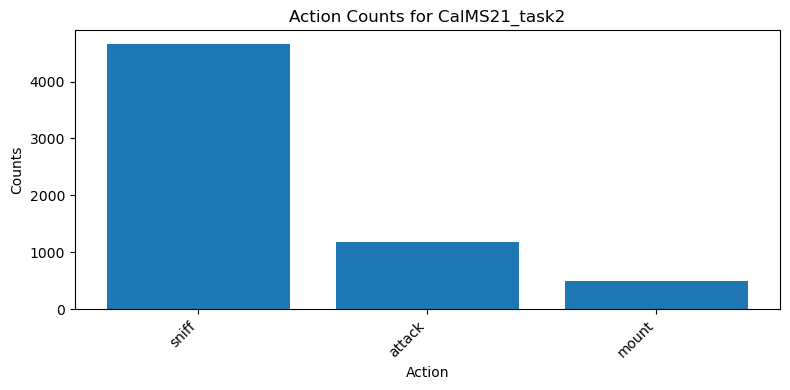

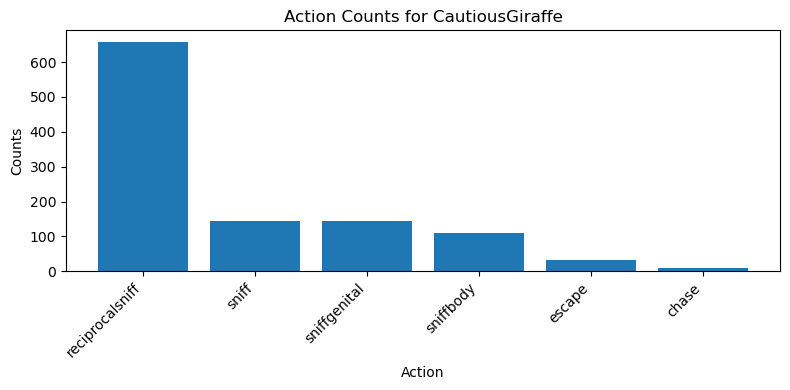

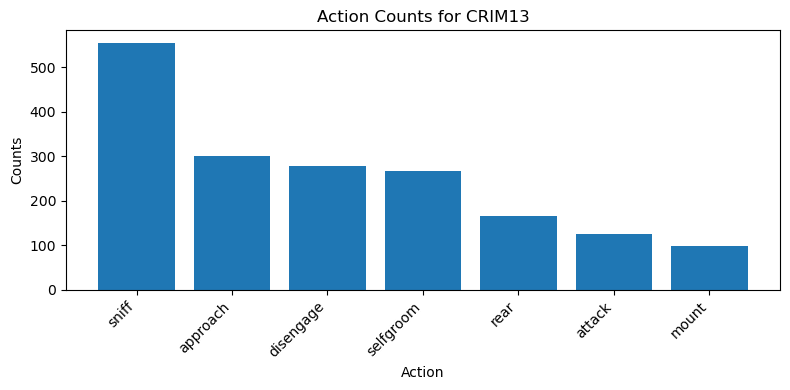

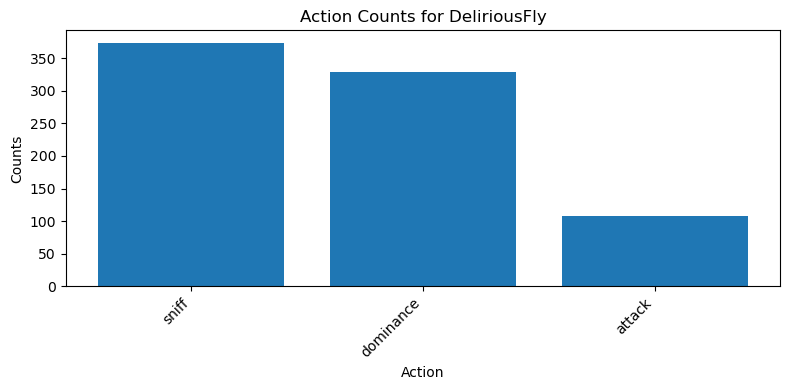

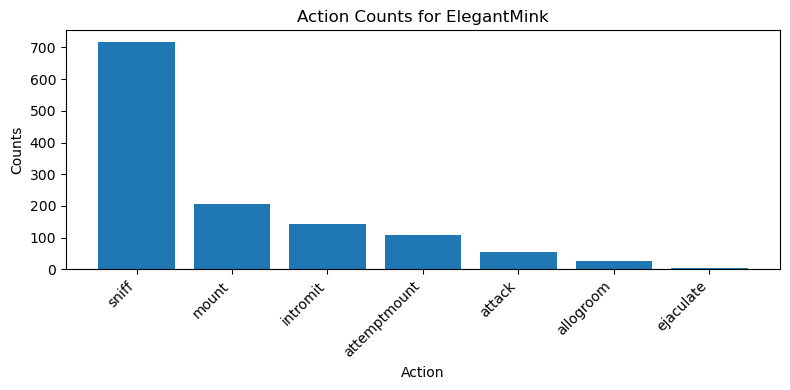

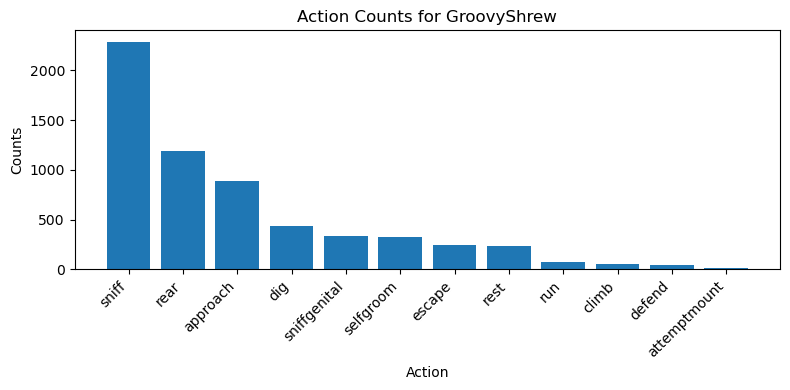

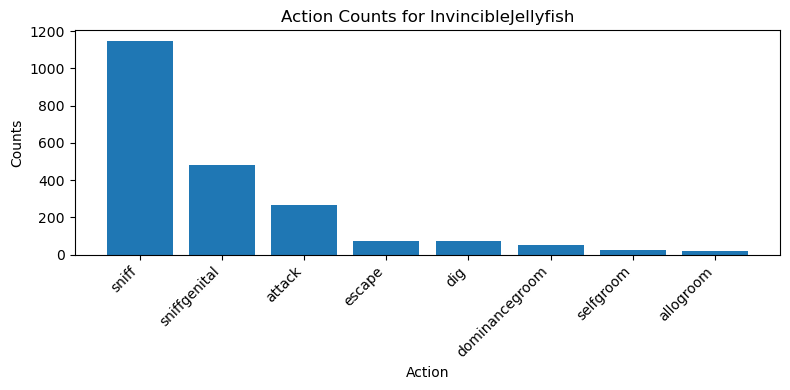

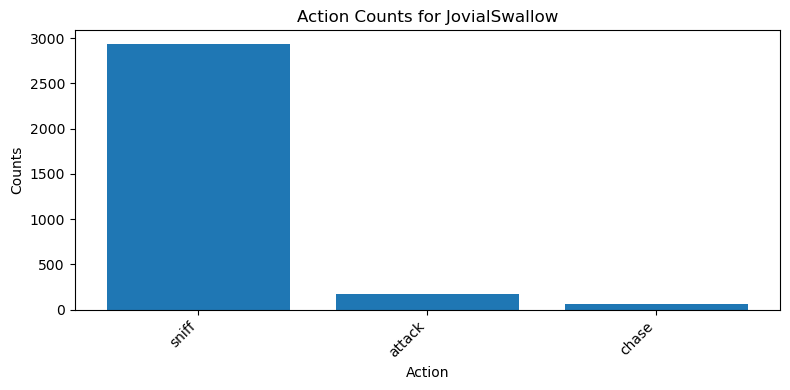

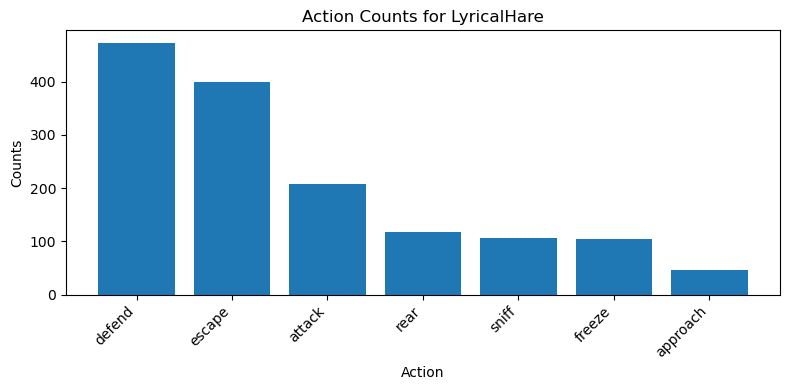

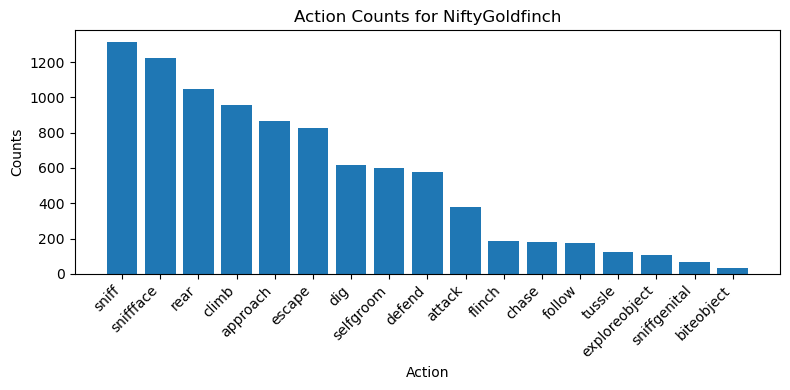

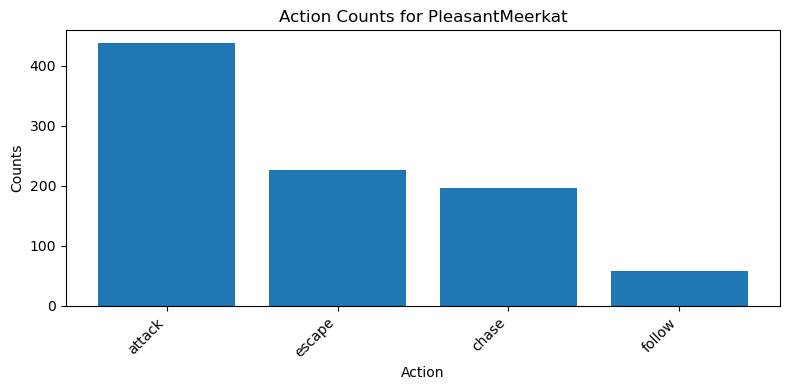

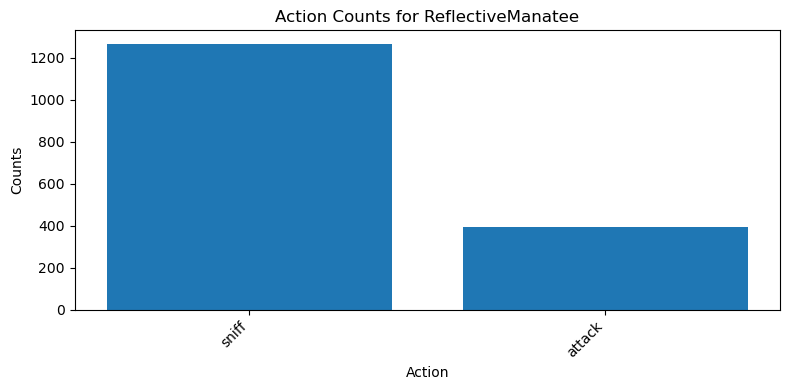

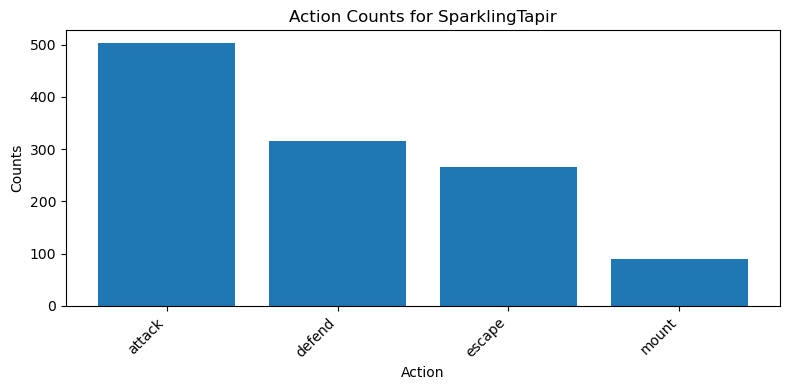

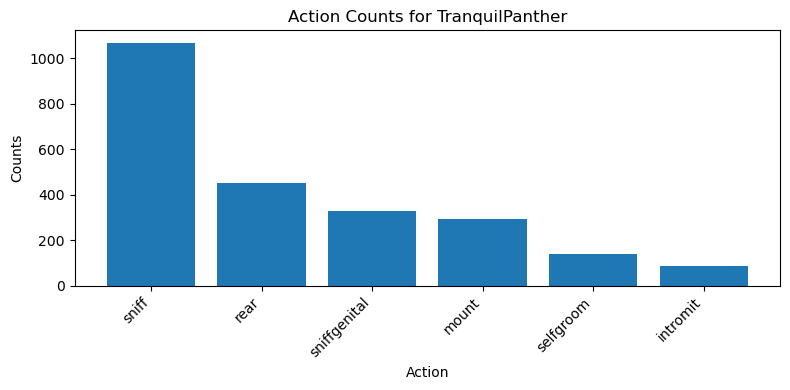

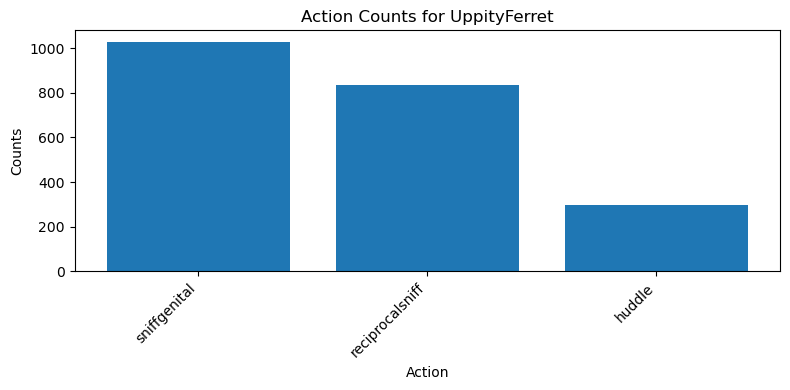

In [17]:
import pandas as pd
import glob
import os

base_dir = '../input/train_annotation/'

# Lget all dir in train_annotation
folders = [f.path for f in os.scandir(base_dir) if f.is_dir()]

for folder in folders:
    print(f"Folder: {os.path.basename(folder)}")
    parquet_files = glob.glob(os.path.join(folder, '*.parquet'))
    
    print(f"Number of parquet files: {len(parquet_files)}")
    
    # read and merge data from file parquet
    dfs = [pd.read_parquet(f) for f in parquet_files]
    data = pd.concat(dfs, ignore_index=True)

    # all unique value of 'action'
    unique_actions = data['action'].unique()
    print(unique_actions)

lab_action_counts = {}
for folder in folders:
    parquet_files = glob.glob(os.path.join(folder, '*.parquet'))
    dfs = [pd.read_parquet(f) for f in parquet_files]
    data = pd.concat(dfs, ignore_index=True)

    action_counts = data['action'].value_counts()
    lab_action_counts[os.path.basename(folder)] = action_counts

for lab, actions in lab_action_counts.items():
    plt.figure(figsize=(8, 4))
    plt.bar(actions.keys(), actions.values)
    plt.title(f'Action Counts for {lab}')
    plt.xlabel('Action')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()




In [18]:
import pandas as pd
import glob
import os

base_dir = '../input/train_tracking/'

# Lget all dir in train_annotation
folders = [f.path for f in os.scandir(base_dir) if f.is_dir()]

for folder in folders:
    folder_name = os.path.basename(folder)
    if folder_name in ['MABe22_movies', 'MABe22_keypoints']:
        continue
    print(f"Folder: {os.path.basename(folder)}")
    parquet_files = glob.glob(os.path.join(folder, '*.parquet'))
    
    print(f"Number of parquet files: {len(parquet_files)}")
    
    # read and merge data from file parquet
    dfs = [pd.read_parquet(f) for f in parquet_files]
    data = pd.concat(dfs, ignore_index=True)

    # all unique value of 'bodypart'
    unique_bodypart = data['bodypart'].unique()
    print(unique_bodypart)



Folder: AdaptableSnail
Number of parquet files: 17
['body_center' 'ear_left' 'ear_right' 'lateral_left' 'lateral_right'
 'nose' 'tail_base' 'tail_midpoint' 'tail_tip' 'neck'
 'headpiece_bottombackleft' 'headpiece_bottombackright'
 'headpiece_topbackleft' 'headpiece_topbackright' 'headpiece_topfrontleft'
 'headpiece_topfrontright' 'headpiece_bottomfrontleft'
 'headpiece_bottomfrontright']
Folder: BoisterousParrot
Number of parquet files: 8
['body_center' 'ear_left' 'ear_right' 'nose' 'tail_base']
Folder: CalMS21_supplemental
Number of parquet files: 297
['ear_left' 'ear_right' 'hip_left' 'hip_right' 'neck' 'nose' 'tail_base']
Folder: CalMS21_task1
Number of parquet files: 101
['ear_left' 'ear_right' 'hip_left' 'hip_right' 'neck' 'nose' 'tail_base']
Folder: CalMS21_task2
Number of parquet files: 76
['ear_left' 'ear_right' 'hip_left' 'hip_right' 'neck' 'nose' 'tail_base']
Folder: CautiousGiraffe
Number of parquet files: 10
['ear_left' 'ear_right' 'hip_left' 'hip_right' 'neck' 'nose' 'tail

In [19]:
class Visualizer():
    """A class for visualizing single frames of mouse videos.

    From https://www.kaggle.com/code/ambrosm/mabe-eda-which-makes-sense
    """
    paws = ['forepaw_left', 'forepaw_right', 'hindpaw_left', 'hindpaw_right']
    head = ['ear_left', 'ear_right', 'nose', 'ear_left']

    def __init__(self, train):
        """Initialize a visualizer.
        
        Parameters:
        train: pandas DataFrame read from train.csv
        """
        self.train = train
    
    def load_video(self, train_idx):
        """Load the specified video into the visualizer"""
        self.train_idx = train_idx
        lab_id = self.train.iloc[train_idx].lab_id
        video_id = self.train.iloc[train_idx].video_id
        path = f"../input/train_tracking/{lab_id}/{video_id}.parquet"
        self.video_name = path.split('/')[-1].split('.')[0]
        self.vid = pd.read_parquet(path)
        try:
            self.annot = pd.read_parquet(path.replace('train_tracking', 'train_annotation'))
        except FileNotFoundError:
            self.annot = None
        self.pvid = self.vid.pivot(columns=['mouse_id', 'bodypart'], index='video_frame', values=['x', 'y'])
        self.bodyparts = set(self.pvid.loc[self.pvid.index[0], ('x', 1)].index)
        # print(self.bodyparts)
        self.n_mouses = len(np.unique(self.pvid.columns.get_level_values('mouse_id')))

    def __len__(self):
        """Frame count of video"""
        return len(self.pvid)

    def plot_frame(self, frame_idx):
        """Plot the selected frame of the previously loaded video"""
        video_frame = self.pvid.index[frame_idx]
        if (self.pvid.loc[video_frame] == 0).all():
            print(f"{self.train_idx}.{frame_idx} is empty.")
            return
        for mouse, color in enumerate(['g', 'b', 'orange', 'brown'][:self.n_mouses]):
            mouse_id = mouse + 1
            mx = self.pvid.loc[video_frame, ('x', mouse_id)].copy()
            my = self.pvid.loc[video_frame, ('y', mouse_id)].copy()

            # Plot the head
            # Every mouse has ear_left and ear_right
            if 'nose' in mx.index and mx['nose'] != 0:
                plt.fill(mx[self.head], my[self.head], color=color, alpha=0.5)
                plt.scatter([mx['nose']], [my['nose']], s=100, color=color)
            else:
                plt.plot(mx[['ear_left', 'ear_right']], my[['ear_left', 'ear_right']], color=color)
            if 'head' not in mx.index:
                mx['head'] = mx[['ear_left', 'ear_right']].mean()
                my['head'] = my[['ear_left', 'ear_right']].mean()

            # Plot the body and tail
            # Every mouse has tail_base, but it can be 0
            parts_list = ['head']
            if 'neck' in mx.index and mx['neck'] != 0:
                parts_list.append('neck')
            if 'body_center' in mx.index and mx['body_center'] != 0:
                parts_list.append('body_center')
            if mx['tail_base'] != 0:
                parts_list.append('tail_base')
            if 'tail_tip' in mx.index and mx['tail_tip'] != 0:
                parts_list.append('tail_tip')
            plt.plot(mx[parts_list], my[parts_list], color=color)

            # Plot the width of the body
            if 'lateral_right' in mx.index:
                plt.plot(mx[['lateral_right', 'lateral_left']], my[['lateral_right', 'lateral_left']], color=color)
                
            # Plot the hip
            if 'hip_right' in mx.index:
                plt.plot(mx[['hip_right', 'hip_left']], my[['hip_right', 'hip_left']], color=color)
                
            # Plot the paws
            if 'forepaw_left' in mx.index:
                plt.scatter(mx[self.paws], my[self.paws], color=color)

        if self.annot is not None:
            actions = set(self.annot.action[(self.annot.start_frame <= video_frame) & (video_frame <= self.annot.stop_frame)])
            if len(actions) == 0:
                actions = ''
        else:
            actions = ''
        plt.title(f'{self.train_idx}.{frame_idx} {actions}')
        plt.gca().set_aspect('equal')
        plt.show()

visualizer = Visualizer(train)


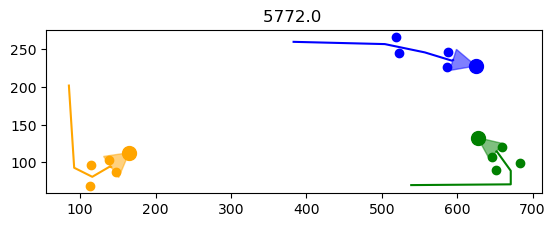

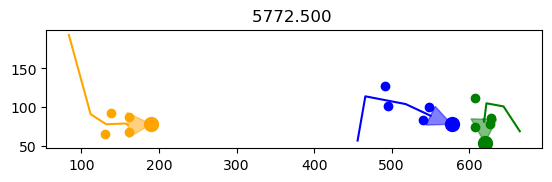

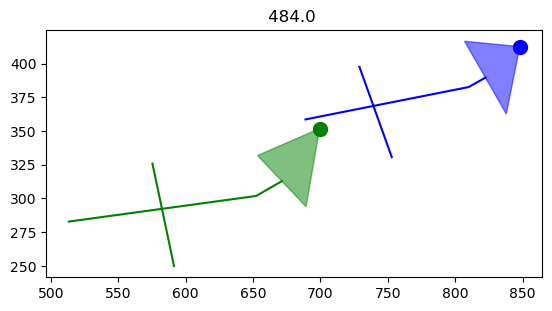

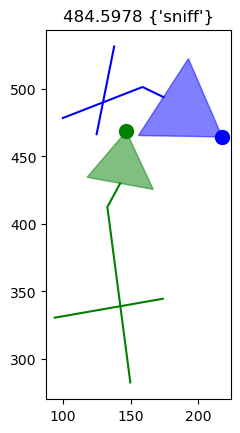

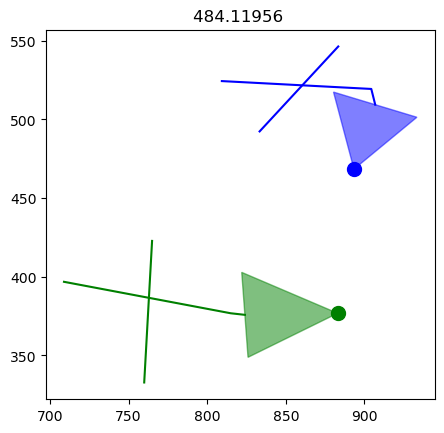

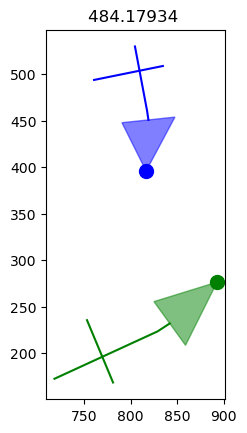

397.0 is empty.


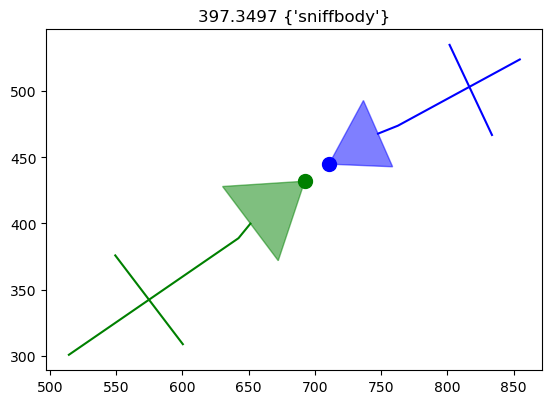

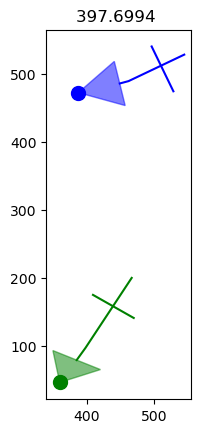

428.0 is empty.


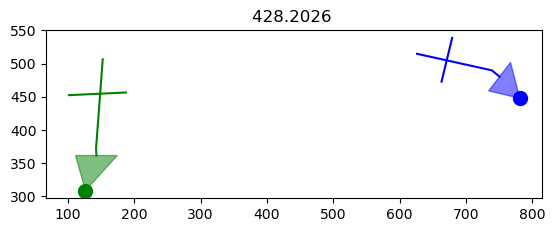

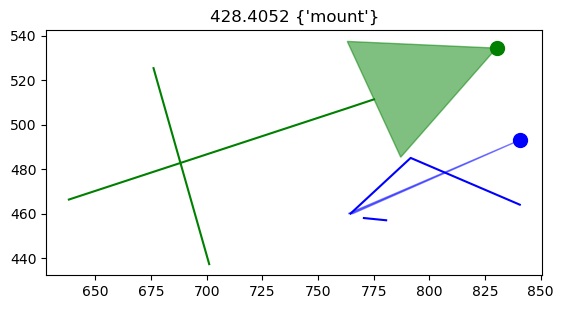

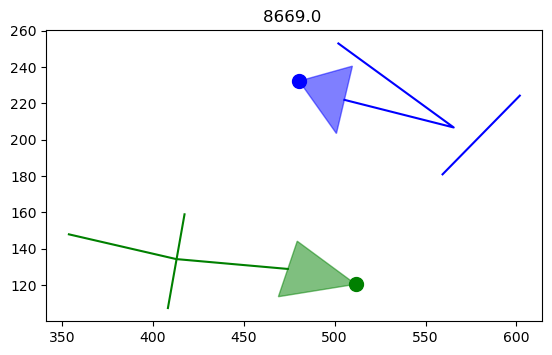

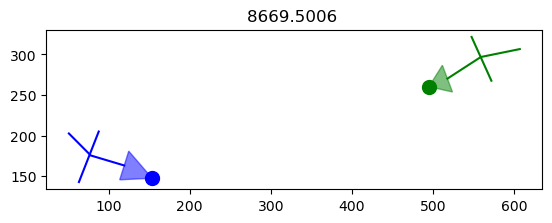

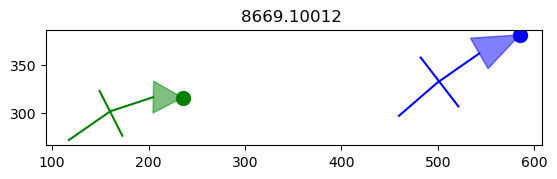

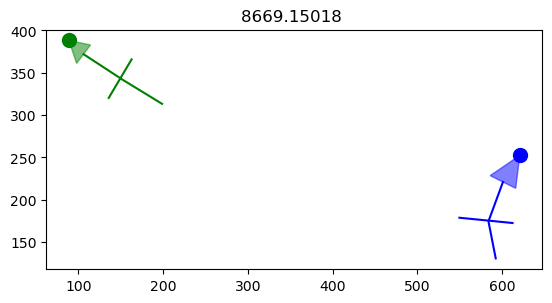

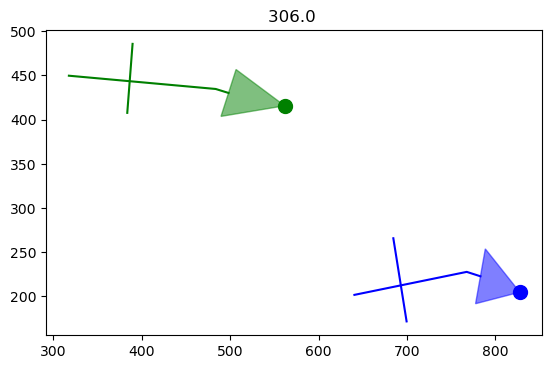

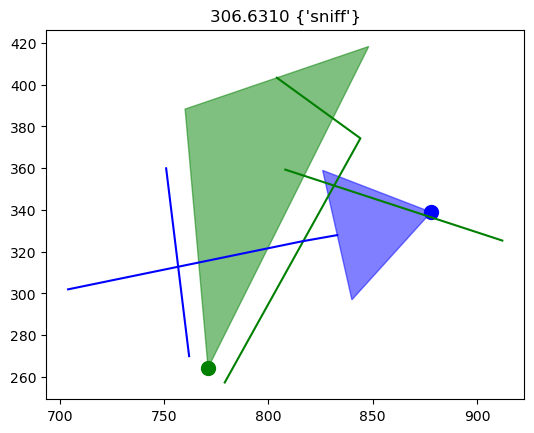

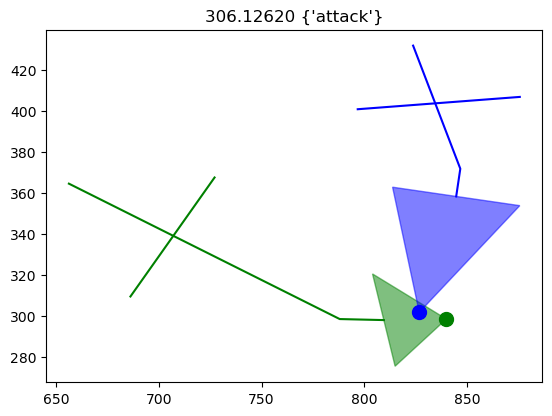

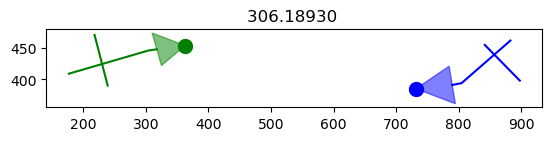

In [20]:
visualizer.load_video(5772)
visualizer.plot_frame(0)
visualizer.plot_frame(500)

visualizer.load_video(484)
for i in range(0, len(visualizer), len(visualizer) // 3):
    visualizer.plot_frame(i)

visualizer.load_video(397)
for i in range(0, len(visualizer), len(visualizer) // 3):
    visualizer.plot_frame(i)

visualizer.load_video(428)
for i in range(0, len(visualizer), len(visualizer) // 3):
    visualizer.plot_frame(i)

visualizer.load_video(8669)
for i in range(0, len(visualizer), len(visualizer) // 3):
    visualizer.plot_frame(i)

visualizer.load_video(306)
for i in range(0, len(visualizer), len(visualizer) // 3):
    visualizer.plot_frame(i)



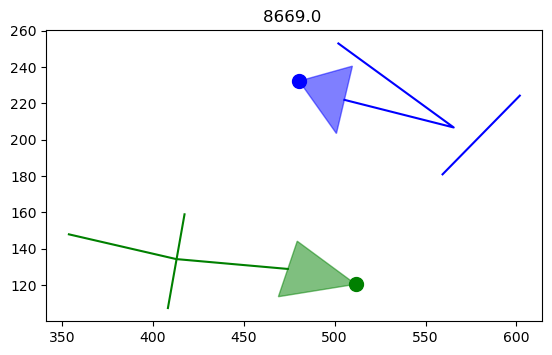

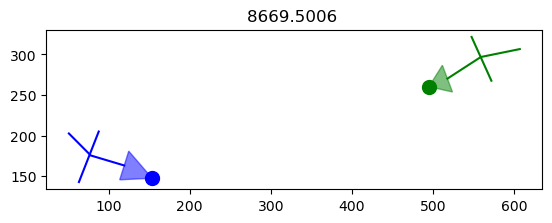

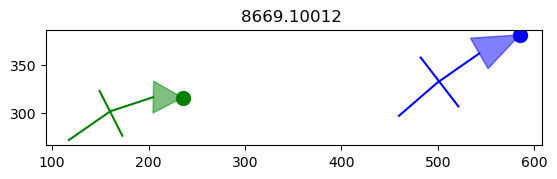

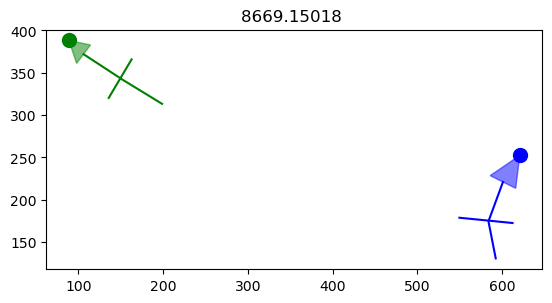

In [21]:
visualizer.load_video(8669)
for i in range(0, len(visualizer), len(visualizer) // 3):
    visualizer.plot_frame(i)

In [22]:
import pandas as pd

# Đổi path cho khớp với notebook của bạn
train = pd.read_csv('../input/train.csv')                 # metadata per video


In [23]:
train.head()

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,...,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut


In [24]:
type(train["body_parts_tracked"].iloc[0])

str

In [25]:
train.dtypes


lab_id                 object
video_id                int64
mouse1_strain          object
mouse1_color           object
mouse1_sex             object
mouse1_id             float64
mouse1_age             object
mouse1_condition       object
mouse2_strain          object
mouse2_color           object
mouse2_sex             object
mouse2_id             float64
mouse2_age             object
mouse2_condition       object
mouse3_strain          object
mouse3_color           object
mouse3_sex             object
mouse3_id             float64
mouse3_age             object
mouse3_condition       object
mouse4_strain          object
mouse4_color           object
mouse4_sex             object
mouse4_id             float64
mouse4_age             object
mouse4_condition       object
frames_per_second     float64
video_duration_sec    float64
pix_per_cm_approx     float64
video_width_pix         int64
video_height_pix        int64
arena_width_cm        float64
arena_height_cm       float64
arena_shap

In [26]:
SECTION_BODYPARTS = {
    1: ['body_center', 'ear_left', 'ear_right',
        'headpiece_bottombackleft', 'headpiece_bottombackright',
        'headpiece_bottomfrontleft', 'headpiece_bottomfrontright',
        'headpiece_topbackleft', 'headpiece_topbackright',
        'headpiece_topfrontleft', 'headpiece_topfrontright',
        'lateral_left', 'lateral_right', 'neck', 'nose',
        'tail_base', 'tail_midpoint', 'tail_tip'],
    
    2: ['body_center', 'ear_left', 'ear_right', 'hip_left', 'hip_right',
        'lateral_left', 'lateral_right', 'nose', 'spine_1', 'spine_2',
        'tail_base', 'tail_middle_1', 'tail_middle_2', 'tail_tip'],
    
    3: ['body_center', 'ear_left', 'ear_right',
        'lateral_left', 'lateral_right', 'neck', 'nose',
        'tail_base', 'tail_midpoint', 'tail_tip'],
    
    4: ['body_center', 'ear_left', 'ear_right',
        'lateral_left', 'lateral_right', 'nose',
        'tail_base', 'tail_tip'],
    
    5: ['body_center', 'ear_left', 'ear_right',
        'lateral_left', 'lateral_right', 'nose',
        'tail_base'],
    
    6: ['body_center', 'ear_left', 'ear_right',
        'nose', 'tail_base'],
    
    7: ['ear_left', 'ear_right', 'head', 'tail_base'],
    
    8: ['ear_left', 'ear_right', 'hip_left', 'hip_right',
        'neck', 'nose', 'tail_base'],
    
    9: ['ear_left', 'ear_right', 'nose', 'tail_base', 'tail_tip'],
}


In [27]:
import ast
import pandas as pd

def parse_bodyparts(s):
    if pd.isna(s):
        return []
    if isinstance(s, list):
        return s          # phòng khi sau này đã là list rồi
    return ast.literal_eval(s)   # parse chuỗi '["a","b"]' -> ["a","b"]

train["bodyparts_list"] = train["body_parts_tracked"].apply(parse_bodyparts)


In [28]:
# chuẩn hoá về tuple sorted + lowercase
SECTION_TUPLES = {
    sec: tuple(sorted(bp.lower() for bp in lst))
    for sec, lst in SECTION_BODYPARTS.items()
}

# chuẩn hoá list trong train
train["bodyparts_norm"] = train["bodyparts_list"].apply(
    lambda lst: tuple(sorted(bp.lower() for bp in lst))
)

def detect_section(bp_tuple):
    for sec, tpl in SECTION_TUPLES.items():
        if bp_tuple == tpl:
            return sec
    return None

train["section"] = train["bodyparts_norm"].apply(detect_section)

In [29]:
train["body_parts_tracked"].unique()


array(['["body_center", "ear_left", "ear_right", "headpiece_bottombackleft", "headpiece_bottombackright", "headpiece_bottomfrontleft", "headpiece_bottomfrontright", "headpiece_topbackleft", "headpiece_topbackright", "headpiece_topfrontleft", "headpiece_topfrontright", "lateral_left", "lateral_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]',
       '["body_center", "ear_left", "ear_right", "lateral_left", "lateral_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]',
       '["body_center", "ear_left", "ear_right", "nose", "tail_base"]',
       '["ear_left", "ear_right", "hip_left", "hip_right", "neck", "nose", "tail_base"]',
       '["body_center", "ear_left", "ear_right", "lateral_left", "lateral_right", "nose", "tail_base", "tail_tip"]',
       '["ear_left", "ear_right", "head", "tail_base"]',
       '["ear_left", "ear_right", "nose", "tail_base", "tail_tip"]',
       '["body_center", "ear_left", "ear_right", "forepaw_left", "forepaw_right", "hindpaw_

In [30]:
videos_by_section = {
    sec: train.loc[train["section"] == sec, "video_id"].tolist()
    for sec in SECTION_BODYPARTS.keys()
}

for sec, vids in videos_by_section.items():
    print(f"Section {sec}: {len(vids)} videos")
    print(vids[:10], "\n")  


Section 1: 7 videos
[44566106, 278643799, 355542626, 1260392287, 1408652858, 1643942986, 1717182687] 

Section 2: 21 videos
[50183736, 86824777, 203484552, 403002745, 414099215, 532567355, 602691466, 659002593, 815797699, 1085105007] 

Section 3: 10 videos
[143861384, 209576908, 351967631, 678426900, 705948978, 878123481, 1212811043, 1351098077, 1596473327, 2078515636] 

Section 4: 42 videos
[246051591, 342269939, 1378394926, 1549344783, 1649549863, 1894091332, 599439, 62373697, 74645358, 201760488] 

Section 5: 89 videos
[315178669, 390030205, 498093416, 531131153, 631163660, 748834872, 828175681, 912929235, 920161729, 1270744933] 

Section 6: 19 videos
[402963089, 459610814, 613246188, 1059582964, 1184291605, 1201849558, 1459695188, 1985626297, 101686631, 425399867] 

Section 7: 17 videos
[1550138, 5119542, 502020762, 593750722, 768075914, 870599401, 991578442, 1057262087, 1118505887, 1194163628] 

Section 8: 634 videos
[363958890, 415181540, 670907179, 793202924, 840324395, 10094594

In [31]:
train.head()

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method,bodyparts_list,bodyparts_norm,section
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut,"[body_center, ear_left, ear_right, headpiece_b...","(body_center, ear_left, ear_right, headpiece_b...",1.0
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,...,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut,"[body_center, ear_left, ear_right, lateral_lef...","(body_center, ear_left, ear_right, lateral_lef...",3.0
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,...,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut,"[body_center, ear_left, ear_right, lateral_lef...","(body_center, ear_left, ear_right, lateral_lef...",3.0
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut,"[body_center, ear_left, ear_right, headpiece_b...","(body_center, ear_left, ear_right, headpiece_b...",1.0
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,...,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut,"[body_center, ear_left, ear_right, lateral_lef...","(body_center, ear_left, ear_right, lateral_lef...",3.0


In [1]:
subset = train[train['lab_id'].str.startswith('SparklingTapir', na=False)].copy()
print("Total videos:", len(subset))
print("Unique behaviors_labeled:", subset['behaviors_labeled'].unique())
print("\nCounts:")
print(subset['behaviors_labeled'].value_counts(dropna=False))

NameError: name 'train' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('../input/train.csv')

In [5]:
train.head()

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,...,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut


In [6]:
body_parts_tracked_list = list(np.unique(train.body_parts_tracked))

In [11]:
print(body_parts_tracked_list[0])

["body_center", "ear_left", "ear_right", "forepaw_left", "forepaw_right", "hindpaw_left", "hindpaw_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]


In [14]:
import os
import pandas as pd

section_actions = {
    0: [],
    1: [],
    2: ["rear", "selfgroom", "sniff", "intromit", "mount"],
    3: [],
    4: [],
    5: ["sniffgenital"],
    6: [],
    7: ["intromit", "mount"],
    8: [],
    9: [],
}

ann_root = "../input/train_annotation"
results = {}

for section in range(0, len(body_parts_tracked_list)):
    bp_str = body_parts_tracked_list[section]
    df_bp = train.loc[train["body_parts_tracked"] == bp_str]

    # Bộ đếm tần suất
    action_counts = {act: 0 for act in section_actions[section]}

    print(f"\n==================== SECTION {section} ====================")
    print("Bodyparts =", bp_str)
    missing = 0
    for _, row in df_bp.iterrows():
        lab_id = row["lab_id"]
        video_id = row["video_id"]

        ann_path = os.path.join(ann_root, lab_id, f"{video_id}.parquet")

        if not os.path.exists(ann_path):
            print(f"⚠️ Missing annotation → {lab_id}/{video_id}")
            missing += 1
            continue

        ann = pd.read_parquet(ann_path)

        # Lấy toàn bộ action của section này
        mask = ann["action"].isin(section_actions[section])
        hits = ann[mask]

        if not hits.empty:
            # cập nhật bộ đếm
            for act in hits["action"]:
                action_counts[act] += 1

    # lưu kết quả 
    results[bp_str] = action_counts

    print(f"Số video thuộc pattern này: {len(df_bp)}")
    print(f"Số missing của pattern này: {missing}")
    print("\nTần suất action trong section", section)
    print(action_counts)

print("\n\n===== KẾT QUẢ TỔNG =====")
print(results)



==================== SECTION 0 ====================
Bodyparts = ["body_center", "ear_left", "ear_right", "forepaw_left", "forepaw_right", "hindpaw_left", "hindpaw_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]
⚠️ Missing annotation → MABe22_keypoints/189552
⚠️ Missing annotation → MABe22_keypoints/301471
⚠️ Missing annotation → MABe22_keypoints/302628
⚠️ Missing annotation → MABe22_keypoints/1271944
⚠️ Missing annotation → MABe22_keypoints/1396913
⚠️ Missing annotation → MABe22_keypoints/2296551
⚠️ Missing annotation → MABe22_keypoints/3953293
⚠️ Missing annotation → MABe22_keypoints/4518938
⚠️ Missing annotation → MABe22_keypoints/5186402
⚠️ Missing annotation → MABe22_keypoints/5495599
⚠️ Missing annotation → MABe22_keypoints/5818500
⚠️ Missing annotation → MABe22_keypoints/5953089
⚠️ Missing annotation → MABe22_keypoints/5967035
⚠️ Missing annotation → MABe22_keypoints/6349503
⚠️ Missing annotation → MABe22_keypoints/6739728
⚠️ Missing annotation → MABe22_keypoin